In [1]:
# Clustering methods 

Clustering is one of the most frequently used forms of unsupervised learning. It automatically discover natural grouping in data.

Clustering is especially useful for exploring data you know nothing about. You might find connections you never would have thought of. Clustering can also be useful as a type of feature engineering, where existing and new examples can be mapped and labeled as belonging to one of the identified clusters in the data.

Some typical real world applications of clustering include customer segmentation in marketing.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

In [3]:
df = pd.read_csv("./data/OnlineRetail.csv", encoding= 'unicode_escape')

In [4]:
# Data preparartion before clustering

In [5]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [6]:
# dropping columns
df.drop(['StockCode', 'InvoiceDate','Description','Country'],axis = 1, inplace =True)
print(df["Quantity"].min())
print(df["UnitPrice"].min())

-80995
-11062.06


Negative values probably mean that there were returns. This is important factor for e-commerce, but for this study let's keep only transactions without return (our goal is to introduce and compare different clustering methods).

In [7]:
# Negatives are returns. We keep only positives
df1 = df.loc[df["Quantity"] >0 ]
df1 = df1.loc[df["UnitPrice"] >0 ]
# creating a new column of Total amount
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]
# dropping 'Quantity' and 'UnitPrice'
df1.drop(['Quantity', 'UnitPrice'],axis = 1, inplace =True)
# Checking data for the missing values
df1.isnull().sum()
# Dropping the missing value in customerId .
df.dropna(axis = 0, inplace=True)

In [8]:
#We create 2 new features, Frequency (total number of transactions and Amount, Total amount transactions)
#Amount
Amount = df1.groupby('CustomerID')['Total'].sum()
Amount = Amount.reset_index()
Amount.columns=['CustomerID','Amount']

#frequency
Frequency=df1.groupby('CustomerID')['InvoiceNo'].count()
Frequency=Frequency.reset_index()
Frequency.columns=['CustomerID','Frequency']

# merge both df
df2 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')
df2

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4333,18280.0,180.60,10
4334,18281.0,80.82,7
4335,18282.0,178.05,12
4336,18283.0,2094.88,756


In [9]:
# dropping 'CustomerID' as it has no information
df1.drop(['CustomerID'],axis = 1, inplace =True)

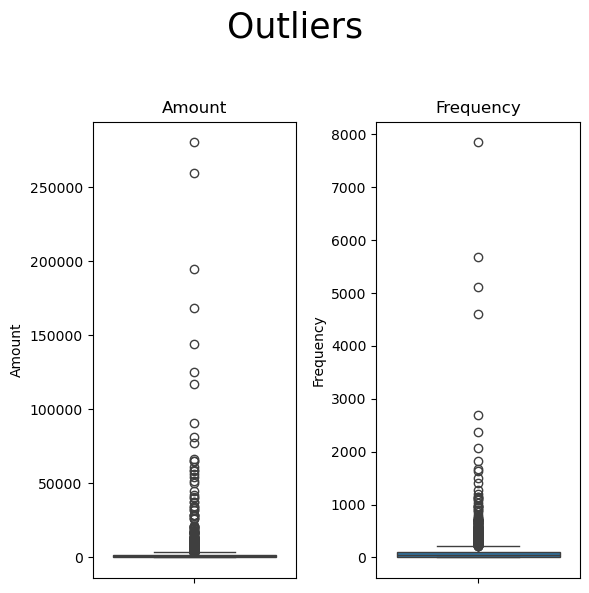

In [14]:
# Looking for outliers, which may disturb for the Segmentation process
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=ax[0], data=df2['Amount'] ).set_title("Amount")
sns.boxplot(ax=ax[1], data=df2['Frequency'] ).set_title("Frequency")

plt.tight_layout()
plt.show()
# This example has outlier issues

It looks like we have significant problem with outliers.

In [16]:
# Scalling data for better results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3=scaler.fit_transform(df2)

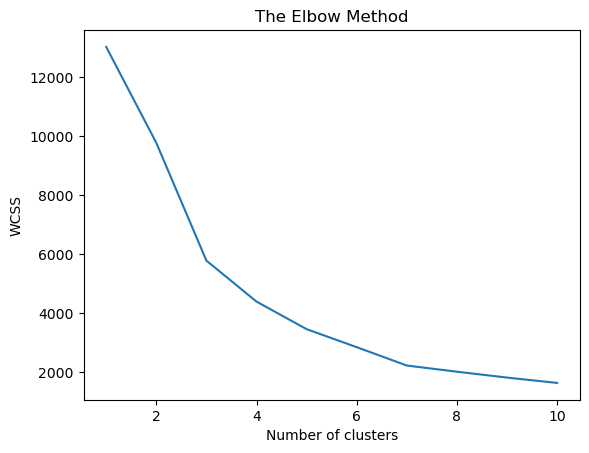

In [17]:
# Determining optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
# Silhouetter qualifies quality of clustering
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Instantiate the KMeans for 5 clusters
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(df3)
# Calculate Silhoutte Score
score = silhouette_score(df3, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score for 5 clusters: %.3f' % score)

# Instantiate the KMeans for 4 clusters
km = KMeans(n_clusters=4, random_state=42)
# Fit the KMeans model
km.fit_predict(df3)
# Calculate Silhoutte Score
score = silhouette_score(df3, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score for 4 clusters: %.3f' % score)

# Instantiate the KMeans for 6 clusters
km = KMeans(n_clusters=6, random_state=42)
# Fit the KMeans model
km.fit_predict(df3)
# Calculate Silhoutte Score
score = silhouette_score(df3, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score for 6 clusters: %.3f' % score)
# Number is 5

Silhouetter Average Score for 5 clusters: 0.507
Silhouetter Average Score for 4 clusters: 0.501
Silhouetter Average Score for 3 clusters: 0.419


# K-means

In [34]:
# Copying data sets
df_kmeans = df2.copy()

In [35]:
# Training model
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_kmeans)


In [36]:

# Checking number of items in clusters and creating 'Cluster' column
df_kmeans['Cluster'] = y_kmeans
df_kmeans['Cluster'].value_counts()

Cluster
4    2019
0    1967
5     293
3      39
2      15
1       5
Name: count, dtype: int64

<Axes: xlabel='Amount', ylabel='Frequency'>

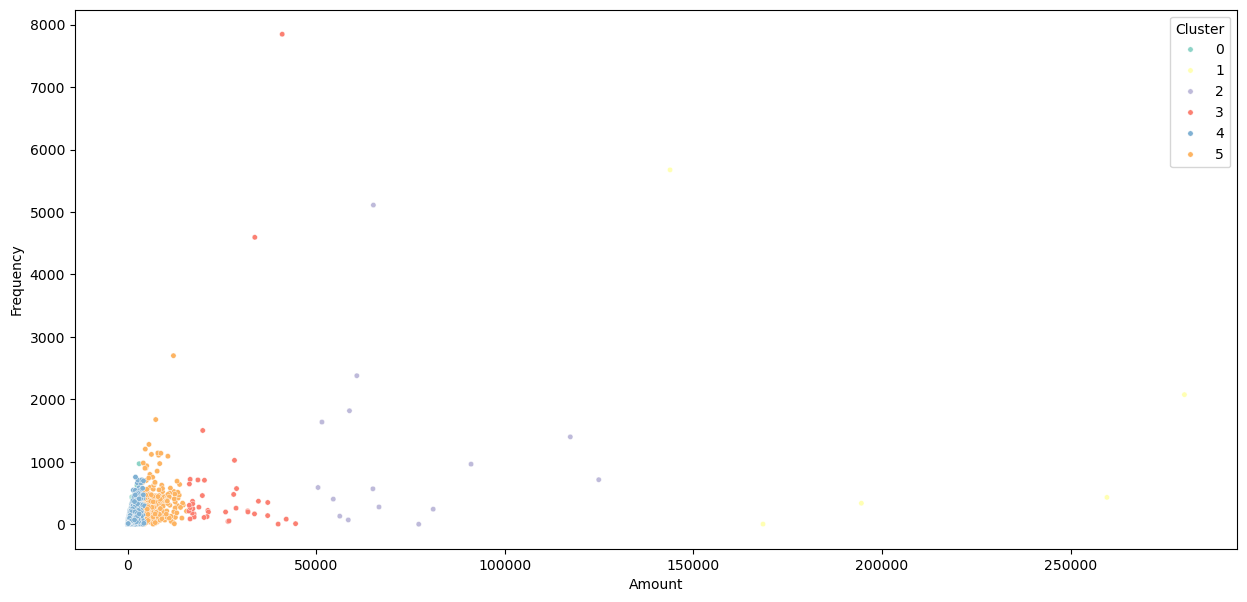

In [37]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_kmeans, x='Amount', y='Frequency', hue = 'Cluster', s=15, palette="Set3")

In [38]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.8.4
numpy               1.26.4
pandas              2.2.2
seaborn             0.13.2
session_info        1.0.0
sklearn             1.4.2
-----
IPython             8.22.2
jupyter_client      8.6.1
jupyter_core        5.7.2
-----
Python 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:16:53) [MSC v.1929 64 bit (AMD64)]
Windows-10-10.0.22631-SP0
-----
Session information updated at 2024-05-29 17:48
